# Бинарный поиск

### Шаг 1: Понимание бинарного поиска

Бинарный поиск работает на отсортированном массиве, и основная идея заключается в том, чтобы на каждом шаге выкидывать половину. Это игра "больше-меньше".

### Шаг 2: Визуализация работы алгоритма

Теперь добавим визуализацию. Будем использовать библиотеку `matplotlib` для отображения шагов.

Угадываем | Нужно угадать
250 < 282 Больше
375 > 282 Меньше
312 > 282 Меньше
281 < 282 Больше
296 > 282 Меньше
288 > 282 Меньше
284 > 282 Меньше
282 == 282 Элемент найден!


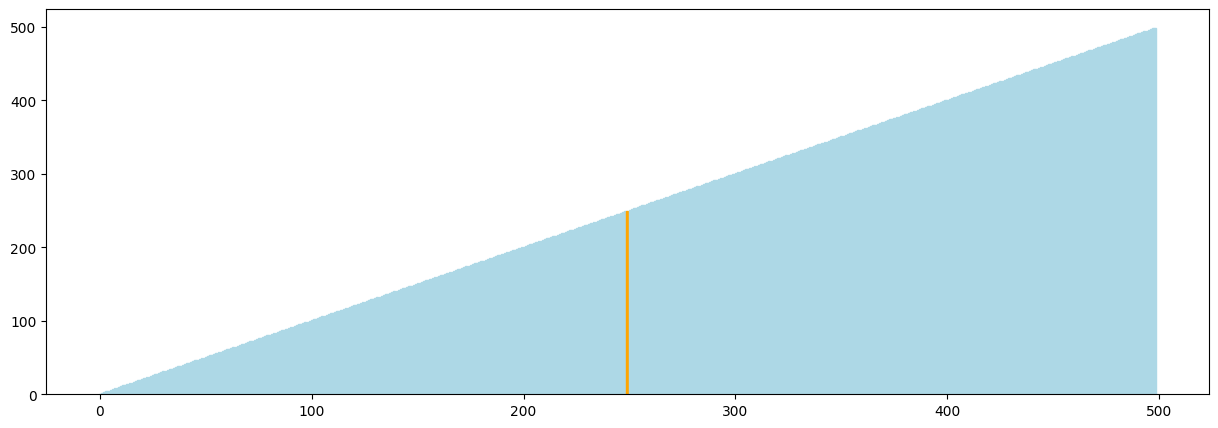

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

print('Угадываем | Нужно угадать')

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    steps = []  # Для визуализации шагов

    while left <= right:
        mid = (left + right) // 2
        steps.append((left, mid, right))  # Записываем текущий шаг

        if arr[mid] == target:
            print(f"{arr[mid]} == {target} Элемент найден!")
            return mid, steps
        elif arr[mid] < target:
            print(f"{arr[mid]} < {target} Больше")
            left = mid + 1
        else:
            print(f"{arr[mid]} > {target} Меньше")
            right = mid - 1

    return -1, steps  # Если элемент не найден

def visualize_binary_search(arr, target, steps, found_index):
    fig, ax = plt.subplots(figsize=(15, 5))
    bar_list = ax.bar(range(len(arr)), arr, color='lightgrey')

    def update(step):
        left, mid, right = step
        for i, rect in enumerate(bar_list):
            if left <= i <= right:
                rect.set_color('lightblue')
            else:
                rect.set_color('lightgrey')
        bar_list[mid].set_color('orange')  # Средний элемент

        if found_index == mid:
            bar_list[found_index].set_color('green')

    anim = FuncAnimation(fig, update, frames=steps, repeat=True, interval=500)
    return anim

# Создаем массив из 1000 элементов и задаем целевое число
arr = list(range(1, 500))
target = 282
index, steps = binary_search(arr, target)

anim = visualize_binary_search(arr, target, steps, index)
HTML(anim.to_jshtml())

### Объяснение:
   - Начинаем с левой (`left`) и правой (`right`) границ массива.
   - На каждом шаге определяем средний элемент (`mid`).
   - Если средний элемент равен цели (`target`), возвращаем его индекс.
   - Если цель больше среднего элемента, ищем в правой половине массива.
   - Иначе — в левой половине.

### Шаг 3: Алгоритм

Начнем с простой реализации бинарного поиска:

1. Определяем границы массива: `left` и `right`.
2. Пока `left` меньше или равно `right`:
   - Находим средний элемент `mid`.
   - Проверяем, равен ли элемент по индексу `mid` целевому элементу.
   - Если целевой элемент больше, сдвигаем левую границу; если меньше — правую.
3. Если элемент найден — возвращаем его индекс, иначе — -1.

### Шаг 4: Реализация

In [2]:
def binary_search(arr, target):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2 # находим середину между left и right

        if arr[mid] == target: # нашли наше число
            return mid
        elif arr[mid] < target: # отсекаем левую часть
            left = mid + 1
        else: # отбрасываем правую часть
            right = mid - 1

    return -1  # если элемент не найден

In [3]:
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target = 7
index = binary_search(arr, target)
print(f'Искали число {target} и нашли его arr[{index}] = {arr[index]}')

Искали число 7 и нашли его arr[6] = 7
